<a href="https://colab.research.google.com/github/Hadi-Legion/ores5160-2025/blob/main/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1. Reading the CSV File (pandas + csv)

	1.	Use the csv module to open and print the first 5 rows of est2018-pop-res.csv.

	2.	Then use pandas.read_csv() to load the same file into a DataFrame.

	•	Display the shape (rows × columns).

	•	Print the list of column names.

	3.	Which column represents total population? Display the top 5 most populous states


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import pandas as pd
file = "/content/drive/MyDrive/est2018-pop-res.csv"

In [3]:
with open(file, newline="") as f:
    reader = csv.reader(f)
    rows = [next(reader) for _ in range(5)]
    print("First 5 rows using csv module:")
    for r in rows:
        print(r)

First 5 rows using csv module:
['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
['010', '0', '0', '00', 'United States', '327167434', '253768092', '77.6']
['040', '3', '6', '01', 'Alabama', '4887871', '3798031', '77.7']
['040', '4', '9', '02', 'Alaska', '737438', '553622', '75.1']
['040', '4', '8', '04', 'Arizona', '7171646', '5528989', '77.1']


In [4]:
df = pd.read_csv(file)
print("Shape (rows, columns):", df.shape)

print("\nColumn names:")
print(df.columns.tolist())

Shape (rows, columns): (53, 8)

Column names:
['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']


In [5]:
pop_col = [c for c in df.columns if "POP" in c.upper()][0]
print(f"\nPopulation column detected: {pop_col}")

print("\nTop 5 most populous states:")
print(df[['NAME', pop_col]].sort_values(by=pop_col, ascending=False).head())


Population column detected: POPESTIMATE2018

Top 5 most populous states:
             NAME  POPESTIMATE2018
0   United States        327167434
5      California         39557045
44          Texas         28701845
10        Florida         21299325
33       New York         19542209


Q2. Basic Statistical Analysis (pandas)

	1.	Compute the average population across all states.

	2.	Find which region has the highest total population.

	3.	Plot a bar chart showing the population by region (use matplotlib)

In [6]:
import matplotlib.pyplot as plt
avg_pop = df[pop_col].mean()
print(f"\nAverage population across states: {avg_pop:,.0f}")


Average population across states: 12,406,227


In [7]:
region_pop = df.groupby("REGION")[pop_col].sum().sort_values(ascending=False)
print("\nPopulation by Region:")
print(region_pop)

top_region = region_pop.idxmax()
print(f"\nRegion with highest population: {top_region}")


Population by Region:
REGION
0    327167434
3    124753948
4     77993663
2     68308744
1     56111079
X      3195153
Name: POPESTIMATE2018, dtype: int64

Region with highest population: 0


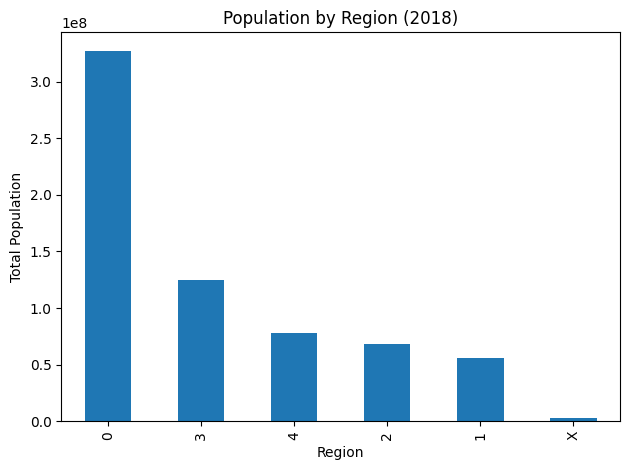

In [8]:
region_pop.plot(kind='bar')
plt.title("Population by Region (2018)")
plt.xlabel("Region")
plt.ylabel("Total Population")
plt.tight_layout()
plt.show()

Q3. Parsing the JSON File (FHIR structure)

Using json module:

	1.	Load patient.json into a Python dictionary.

	2.	Extract and print:

	•	Patient’s full official name

	•	Gender and birth date

	•	Current address (city, state, postal code)
  
	3.	Count how many phone numbers the patient has, and list their types (e.g., work, mobile, home).

In [9]:
import json

json_file = "/content/drive/MyDrive/patient.json"

with open(json_file) as f:
    data = json.load(f)

In [10]:
name_data = data["name"][0]
full_name = " ".join(name_data["given"]) + " " + name_data["family"]
print("Patient Name:", full_name)

Patient Name: Peter James Chalmers


In [11]:
print("Gender:", data.get("gender"))
print("Birth Date:", data.get("birthDate"))

Gender: male
Birth Date: 1974-12-25


In [12]:
addr = data["address"][0]
print("City:", addr.get("city"))
print("State:", addr.get("state"))
print("Postal:", addr.get("postalCode"))

City: PleasantVille
State: Vic
Postal: 3999


In [14]:
phone_count = sum(1 for t in phones if t.get("system") == "phone")
phone_types = [t.get("use") for t in phones if t.get("system") == "phone"]

print("\nNumber of phone numbers:", phone_count)
print("Phone types:", phone_types)


Number of phone numbers: 3
Phone types: ['work', 'mobile', 'old']
